# CSCI700: hmwk2
--- 
Tetsumichi(Telly) Umada 

Data set: weather data, San Diego, downloaded from https://www.ncdc.noaa.gov/cdo-web/

Date: 1939-07-01 - 2020-03-04

In [0]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load data

In [3]:
df = pd.read_csv("noaa_san_diego.csv")

df.head()

,STATION,NAME,DATE,TMAX,TMIN
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1939-07-01,76.0,63.0
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1939-07-02,74.0,65.0
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1939-07-03,71.0,62.0
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1939-07-04,71.0,63.0
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1939-07-05,72.0,64.0


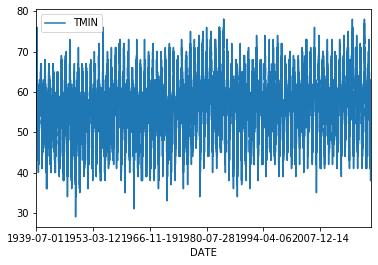

In [4]:
df.plot("DATE", "TMIN")

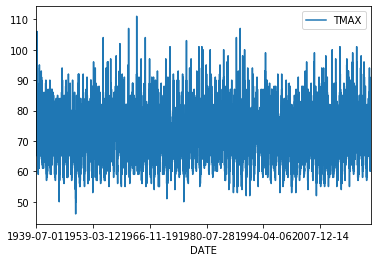

In [5]:
df.plot("DATE", "TMAX")

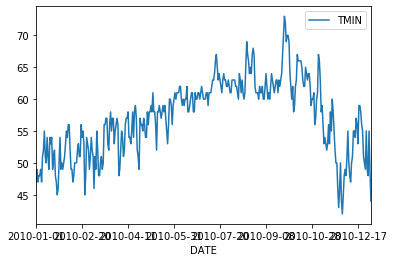

In [6]:
df[df["DATE"].str.contains("2010")].plot("DATE", "TMIN")

## Data pre-process 



In [0]:
df_selected = df[['DATE', 'TMIN']]
df_selected = df_selected.dropna()

df['DATE'] = pd.to_datetime(df['DATE'])

In [0]:
df_selected = df_selected.sort_values(by='DATE')
df_selected['seq_id'] = np.arange(len(df_selected))

In [9]:
df_selected.head()

,DATE,TMIN,seq_id
0,1939-07-01,63.0,0
1,1939-07-02,65.0,1
2,1939-07-03,62.0,2
3,1939-07-04,63.0,3
4,1939-07-05,64.0,4


#### Train and Test split 

In [0]:
split_size = len(df_selected) // 4 

In [0]:
df_train = df_selected[:(3*split_size)]
df_test = df_selected[(3*split_size):]

In [12]:
print("n train:", len(df_train))
print("n test :", len(df_test))

n train: 22098
n test : 7366


#### Shift the data for prediction 

In [0]:
n_step = 1 

df_train_x = df_train[:(-1*n_step)]
df_train_y = df_train[n_step:]

df_test_x = df_test[:(-1*n_step)]
df_test_y = df_test[n_step:]

### LSTM experiment 

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


### Bsse model (LSTM with 10 units; trained with 10 ephocs)

In [0]:
### re-shape for LSTM
train_x = np.array(list(df_train_x['TMIN'])).reshape(len(df_train_x['TMIN']), 1, 1)
train_y = np.array(list(df_train_y['TMIN']))

test_x = np.array(list(df_test['TMIN'])).reshape(len(df_test['TMIN']), 1, 1)
test_y = np.array(list(df_test_y['TMIN']))

In [16]:
model = Sequential()
model.add(LSTM(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(train_x, train_y, epochs=10, validation_split=0.2, batch_size=5)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 17677 samples, validate on 4420 samples
Epoch 1/10





17677/17677 [==============================] - 11s 646us/step - loss: 3075.8646 - mean_squared_error: 3075.8646 - val_loss: 2956.2445 - val_mean_squared_error: 2956.2445
Epoch 2/10
17677/17677 [==============================] - 11s 616us/step - loss: 2705.9912 - mean_squared_error: 2705.9912 - val_loss: 2594.7153 - val_mean_squared_error: 2594.7153
Epoch 3/10
17677/17677 [==============================] - 11s 621us/step - loss: 2361.6089 - mean_squared_error: 2361.6089 - val_loss: 2257.9524 - val_mean_squared_error: 2257.9524
Epoch 4/10
17677/17677 [==============================] - 11s 598us/step - loss: 2041.8444 - mean_squared_error: 2041.8444 - val_loss: 1945.8127 - val_mean_squared_error: 1945.8127
Epoch 5/10
17677/17677 [==============================] - 11s 614us/step - loss: 1746.6287 - mean_squared_error: 1746.628

In [17]:
model.evaluate(test_x[:-1], test_y[:])

7365/7365 [==============================] - 0s 27us/step


[630.3474209766686, 630.3474209766686]

In [0]:
# !pip install -q keras-tuner

# import kerastuner

### Experiments with different number of units

In [36]:
num_units = [i for i in range(10, 101, 10)]
print(num_units)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [0]:
def build_model(unit):
  model = Sequential()
  model.add(LSTM(unit))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mse'])

  return model 

In [38]:
model_hist = [] 
model_eval = [] 

for unit in num_units: 
  model = build_model(unit)
  hist = model.fit(train_x, train_y, epochs=10, validation_split=0.2, batch_size=5)
  model_hist.append(hist)

  val = model.evaluate(test_x[:-1], test_y[:])
  model_eval.append(val)

Train on 17677 samples, validate on 4420 samples
Epoch 1/10
17677/17677 [==============================] - 16s 921us/step - loss: 2638.4610 - mean_squared_error: 2638.4610 - val_loss: 2154.8887 - val_mean_squared_error: 2154.8887
Epoch 2/10
17677/17677 [==============================] - 13s 712us/step - loss: 1646.9617 - mean_squared_error: 1646.9617 - val_loss: 1284.1475 - val_mean_squared_error: 1284.1475
Epoch 3/10
17677/17677 [==============================] - 13s 729us/step - loss: 915.1774 - mean_squared_error: 915.1774 - val_loss: 660.3196 - val_mean_squared_error: 660.3196
Epoch 4/10
17677/17677 [==============================] - 12s 699us/step - loss: 423.5009 - mean_squared_error: 423.5009 - val_loss: 271.1928 - val_mean_squared_error: 271.1928
Epoch 5/10
17677/17677 [==============================] - 13s 717us/step - loss: 154.8899 - mean_squared_error: 154.8899 - val_loss: 91.7929 - val_mean_squared_error: 91.7929
Epoch 6/10
17677/17677 [==============================] - 12

### Model evaluation (on test set)

In [57]:
print("|{:^3}|{:^10}|{:^10}|".format("units", "loss", "mse"))
for i in range(len(model_eval)): 
  loss, mse = model_eval[i]
  print("| {:3} | {:^8.5f} | {:^8.5f} |".format(num_units[i], loss, mse))

|units|   loss   |   mse    |
|  10 | 11.80967 | 11.80967 |
|  20 | 6.14067  | 6.14067  |
|  30 | 7.22004  | 7.22004  |
|  40 | 10.63738 | 10.63738 |
|  50 | 6.26273  | 6.26273  |
|  60 | 6.01600  | 6.01600  |
|  70 | 11.56191 | 11.56191 |
|  80 | 7.67807  | 7.67807  |
|  90 | 6.73912  | 6.73912  |
| 100 | 6.41002  | 6.41002  |


When the number of units for LSTM is 60, it achives the best validation loss. 

In [0]:
from keras.callbacks import ModelCheckpoint

In [73]:
model = build_model(60)

# save the best model 
filepath="best_weights_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
model_hist = model.fit(train_x, train_y, epochs=50, validation_split=0.2, batch_size=5, callbacks=[checkpoint])

Train on 17677 samples, validate on 4420 samples
Epoch 1/50
17677/17677 [==============================] - 21s 1ms/step - loss: 687.4392 - mean_squared_error: 687.4392 - val_loss: 37.9317 - val_mean_squared_error: 37.9317

Epoch 00001: val_loss improved from inf to 37.93168, saving model to best_weights_model.hdf5
Epoch 2/50
17677/17677 [==============================] - 14s 776us/step - loss: 17.6790 - mean_squared_error: 17.6790 - val_loss: 10.4057 - val_mean_squared_error: 10.4057

Epoch 00002: val_loss improved from 37.93168 to 10.40568, saving model to best_weights_model.hdf5
Epoch 3/50
17677/17677 [==============================] - 14s 794us/step - loss: 9.4749 - mean_squared_error: 9.4749 - val_loss: 7.7516 - val_mean_squared_error: 7.7516

Epoch 00003: val_loss improved from 10.40568 to 7.75160, saving model to best_weights_model.hdf5
Epoch 4/50
17677/17677 [==============================] - 14s 786us/step - loss: 8.6831 - mean_squared_error: 8.6831 - val_loss: 10.1779 - val_me

In [74]:
print(model.evaluate(test_x[:-1], test_y[:]))

7365/7365 [==============================] - 0s 42us/step
[6.8738011434623685, 6.8738011434623685]


final model loss: 6.8738; mse: 6.87380

In [0]:
# load best weights 
model.load_weights(filepath)

In [0]:
y_hat = model.predict(test_x)

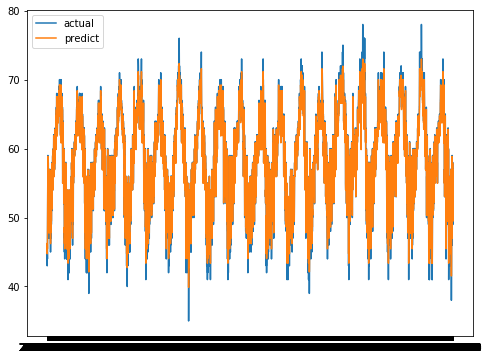

In [80]:
plt.figure(figsize=(8,6))

plt.plot(df_test['DATE'], df_test['TMIN'], label='actual')
plt.plot(df_test['DATE'], y_hat.reshape(1,-1)[0], label='predict')
plt.legend()